# Intorduction to Diffusers

We will train our first diffusion model to generate images of cute butterflies.

## Setup

### Installling required libraries

In [8]:
%pip install -qq -U diffusers datasets transformers accelerate ftfy pyarrow==9.0.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.6.1 requires cubinlinker, which is not installed.
cudf 24.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.6.1 requires ptxcompiler, which is not installed.
cuml 24.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.2.3 which is incompatible.
cudf 24.6.1 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.5.0 which is incompatible.
cudf 24.6.1 requires pyarrow<16.2.0a0,>=16.1.0, but you have pyarrow 9.0.0 which is i

In [1]:
!git config --global credential.helper store

In [2]:
# Logging in to hugging face using tokens
from huggingface_hub import notebook_login

notebook_login()

Some libraries that we will be using and some convenience functions

In [9]:
import numpy as np
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
from PIL import Image

In [10]:
# Utility functions for working with images
def show_images(x):
    """Given a batch of images x, make a grid and convert to PIL"""
    x = x * 0.5 + 0.5  # Map from (-1, 1) back to (0, 1)
    grid = torchvision.utils.make_grid(x)
    grid_im = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
    grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
    return grid_im


def make_grid(images, size=64):
    """Given a list of PIL images, stack them together into a line for easy viewing"""
    output_im = Image.new("RGB", (size * len(images), size))
    for i, im in enumerate(images):
        output_im.paste(im.resize((size, size)), (i * size, 0))
    return output_im

In [11]:
# Setting the device to run on 

# Mac users may need device = 'mps' (untested)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

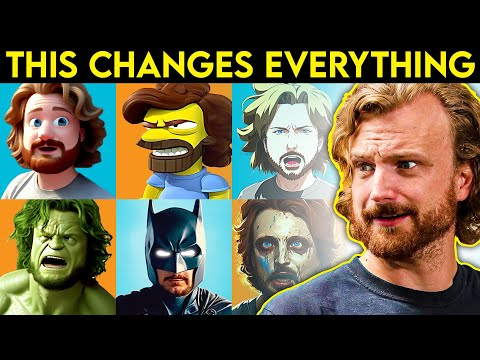

In [12]:
# A video talking about how dreambooth can help create our own model with 
# a specific face , object or style

from IPython.display import YouTubeVideo

YouTubeVideo("W4Mcuh38wyM")

Here's a model that has been trained on 5 photos of a popular children's toy called Mr Potato Head.

### Trying out the StableDiffusionPipeline

In [13]:
from diffusers import StableDiffusionPipeline

# Check out https://huggingface.co/sd-dreambooth-library for loads of models from the community
model_id = "sd-dreambooth-library/mr-potato-head"

# Load the pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-07-27 03:09:37.598182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 03:09:37.598325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 03:09:37.732635: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/589 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.67k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/597 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--sd-dreambooth-library--mr-potato-head/snapshots/34246b94acd8b96166e8d93eaded001c380a2d4e/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--sd-dreambooth-library--mr-potato-head/snapshots/34246b94acd8b96166e8d93eaded001c380a2d4e/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--sd-dreambooth-library--mr-potato-head/snapshots/34246b94acd8b9616

Trying out different prompts for Mr Potato Head
- Number of sampling steps - I guess this determines how many iterations the model needds to run before returning
- Guidance scale - represents how the model tries to match the prompt

In [ ]:
prompt = "an abstract oil painting of sks mr potato head by picasso"
image = pipe(prompt, num_inference_steps=40, guidance_scale=0).images[0]
image

  0%|          | 0/40 [00:00<?, ?it/s]

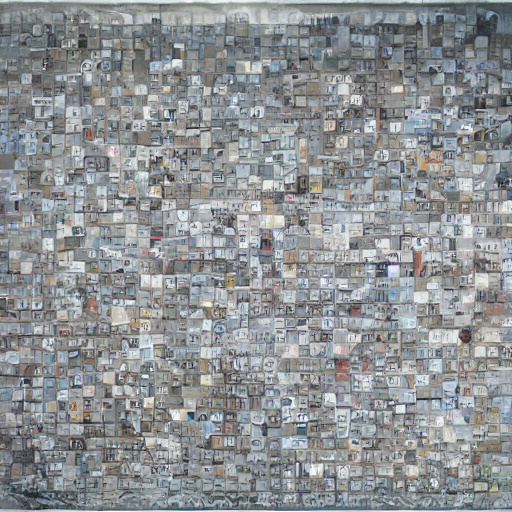

In [15]:
prompt = ""
image = pipe(prompt, num_inference_steps=40, guidance_scale=0).images[0]
image

In [ ]:
prompt = ""
image = pipe(prompt, num_inference_steps=40, guidance_scale=0).images[0]
image

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

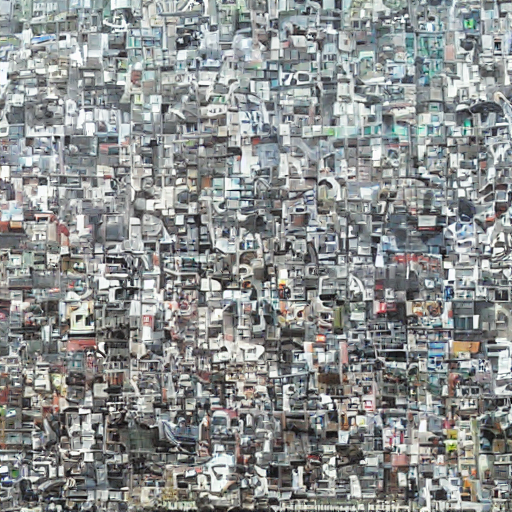

In [17]:
prompt = ""
image = pipe(prompt, num_inference_steps=35, guidance_scale=0).images[0]
image

  0%|          | 0/35 [00:00<?, ?it/s]

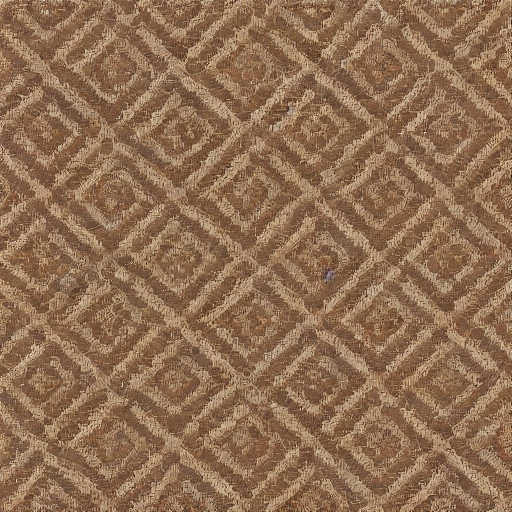

In [18]:
prompt = ""
image = pipe(prompt, num_inference_steps=35, guidance_scale=10).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


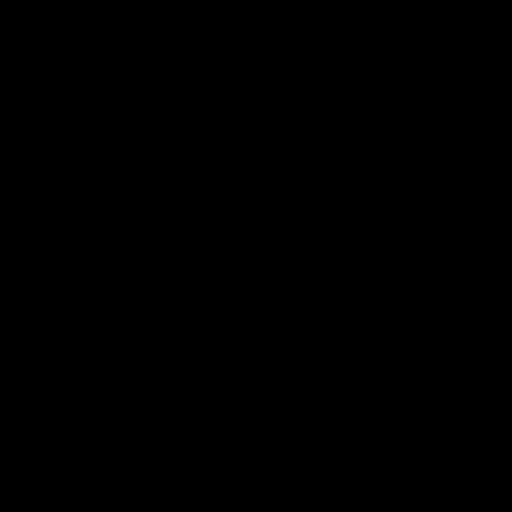

In [19]:
prompt = "Superman"
image = pipe(prompt, num_inference_steps=50, guidance_scale=50).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

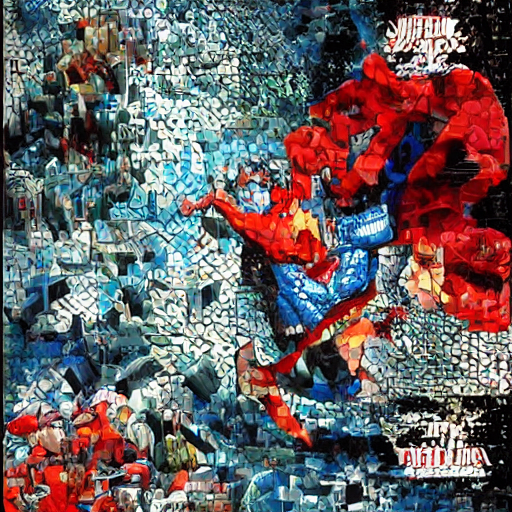

In [20]:
prompt = "Superman"
image = pipe(prompt, num_inference_steps=50, guidance_scale=0).images[0]
image

## Let's ditch the pipeilne and dig deeper to understand whats happening under the hood

#### Downloading a training dataset

We are going to use a dataset of images that has 1000 butterfly pictures. 

In [14]:
import torchvision
from datasets import load_dataset
from torchvision import transforms

In [15]:
dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train")

# Or load images from a local folder
# dataset = load_dataset("imagefolder", data_dir="path/to/folder")


Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Setting up the data for training the model

In [16]:
# We'll train on 32-pixel square images, but you can try larger sizes too
image_size = 32
# You can lower your batch size if you're running out of GPU memory
batch_size = 64

# Define data augmentations
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Resize
        transforms.RandomHorizontalFlip(),  # Randomly flip (data augmentation)
        transforms.ToTensor(),  # Convert to tensor (0, 1)
        transforms.Normalize([0.5], [0.5]),  # Map to (-1, 1)
    ]
)

**Explaining the above piece of code**

Data Augmentations: 
- `transforms.Compose` : Creates a pipeline of transformatoins to be applied to the images 
- `Resize` : Resizes the images to the specified size
- `RandomHorizontalFlip` : Randomly flips the images horizontally


Data Augmentations refers to techniques used to increase the diversity of your training data without actually collecting new data. Here we make slight modifications to the existing data to create new data points. This helps improve the generalization generalization capability of machine learning models by making them more robust to variations in data.

**Random Horizontal Flip**: This technique where images are randomly flipped during training. This helps the model learn to recognize objects regardless of their orientation, making the model more robust and improving it's ability to generalize to new unseen data. This way the model can effectively see more variations of the training images, which helps prevent overfitting and imporves performance on the validation and test datasets. 

In [17]:
def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}


dataset.set_transform(transform)

# Create a dataloader from the dataset to serve up the transformed images in batches
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)


We can grab a batch of images and view some of them like so:

X shape: torch.Size([8, 3, 32, 32])


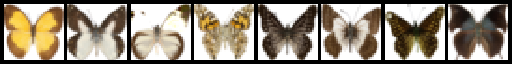

In [25]:
xb = next(iter(train_dataloader))["images"].to(device)[:8]
print("X shape:", xb.shape)
show_images(xb).resize((8 * 64, 64), resample=Image.NEAREST)

### Defining the scheduler

Our plan for training is to take these input images and add noise to them, then feed the noisy images to the model. And during inference, we will use the model predictons to iteratively remove noise. In `diffusers`, these processes are both handled by the `scheduler`.

The noise scheduled determinses how much noise is added at different timesteps. Here's how we might create a scheduler usign the default settings for training and sampling.

In [18]:
from diffusers import DDPMScheduler

noise_scheduler_default = DDPMScheduler(num_train_timesteps=1000)

Using this scheduler, we can gradually add noise to the image over the required number of time steps. Here we have set it to 100. Let's visualize this as a plot.

The blue line represents the franction of the original data and the orange line represents the fraction of noise in the image. 

We see that as we move from the 0th to the 1000th step, the noise percentage gradually increases until at the end it is purely noise.

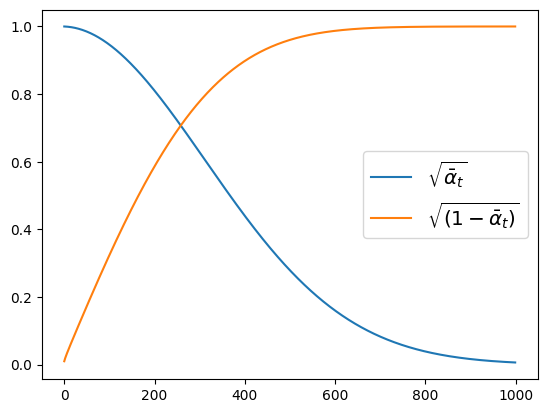

In [27]:
plt.plot(noise_scheduler_default.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler_default.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large")

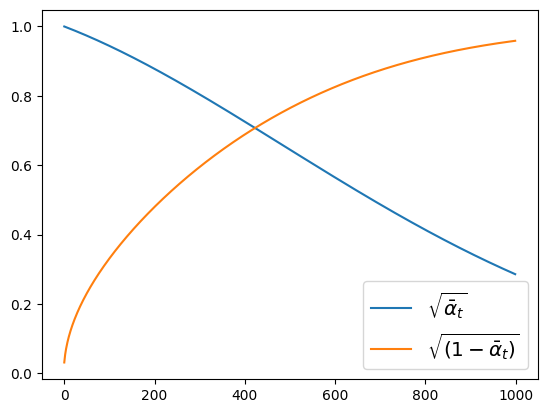

In [28]:
# Exploring various noise schedules

# One with too little noise added:
noise_scheduler_with_beta = DDPMScheduler(num_train_timesteps=1000, beta_start=0.001, beta_end=0.004)
plt.plot(noise_scheduler_with_beta.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler_with_beta.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large")

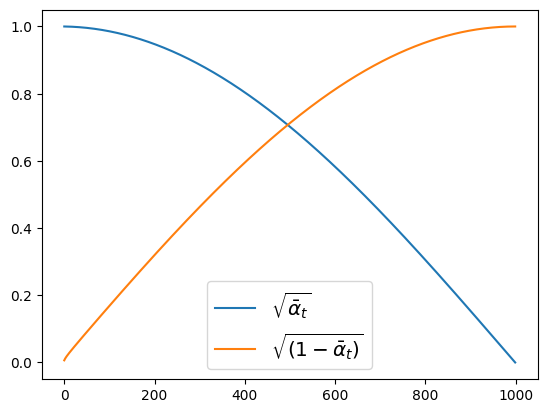

In [29]:
# The 'cosine' schedule, which may be better for small image sizes:
noise_scheduler_cos = DDPMScheduler(num_train_timesteps=1000, beta_schedule='squaredcos_cap_v2')
plt.plot(noise_scheduler_cos.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler_cos.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large")

We are yet to understand how this impacts the training of our model.

Using the scheduler to add noise: 

In [30]:
timesteps = torch.linspace(0, 999, 8).long().to(device)
print(timesteps)

tensor([  0, 142, 285, 428, 570, 713, 856, 999], device='cuda:0')


In [31]:
# xb refers to the sample images that we selected from the training data
# xb = next(iter(train_dataloader))["images"].to(device)[:8]
noise = torch.randn_like(xb)
print(noise)

tensor([[[[ 0.3960, -0.8425,  2.2827,  ..., -1.5697, -1.0691,  0.5511],
          [-0.7409, -1.2924,  2.2386,  ..., -0.1618, -0.0117, -0.4766],
          [ 0.5207, -1.3259,  0.3681,  ...,  1.0346, -0.3953,  0.6955],
          ...,
          [ 0.1622,  2.5004, -0.6145,  ...,  0.1522, -1.6077,  0.6061],
          [-0.1698, -0.4839,  0.3524,  ..., -0.5993, -0.8730, -0.4069],
          [-0.3326, -0.9371,  0.1124,  ..., -0.5115, -0.0867,  0.8220]],

         [[-0.4357,  1.5520,  1.4655,  ...,  0.8738, -1.3169, -0.1133],
          [-1.3183, -0.1759,  1.0055,  ..., -1.6548, -0.8925, -0.1613],
          [-0.1630,  0.1757, -0.3162,  ..., -0.9524, -0.7475,  0.0720],
          ...,
          [-1.9289,  0.1108, -0.4050,  ...,  0.6034, -0.1715,  0.0084],
          [ 0.9006, -1.0072,  0.8305,  ..., -1.5250,  0.5763, -0.1383],
          [ 1.7328,  0.2944, -0.3571,  ..., -0.1087,  1.7432, -0.1557]],

         [[-1.7902,  0.1186,  0.5051,  ...,  1.1938,  0.9249,  1.1959],
          [ 1.6647, -0.1168,  

In [33]:
noisy_xb_default = noise_scheduler_default.add_noise(xb, noise, timesteps)
print("Noisy X shape", noisy_xb_default.shape)

Noisy X shape torch.Size([8, 3, 32, 32])


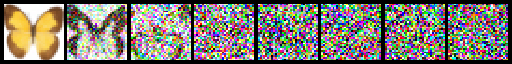

In [34]:
show_images(noisy_xb_default).resize((8 * 64, 64), resample=Image.NEAREST)

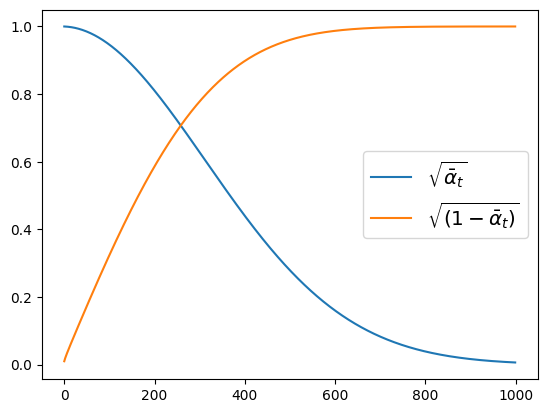

In [35]:
plt.plot(noise_scheduler_default.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler_default.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large")

Trying a different noise scheduler


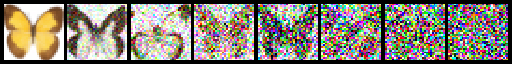

In [36]:
noisy_xb_cos = noise_scheduler_cos.add_noise(xb, noise, timesteps)
show_images(noisy_xb_cos).resize((8 * 64, 64), resample=Image.NEAREST)

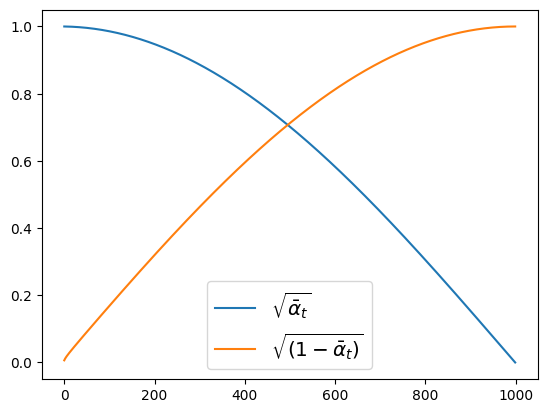

In [37]:
plt.plot(noise_scheduler_cos.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler_cos.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large")

We can look at the difference in how the different noise schedulers change the way noise is added to the image

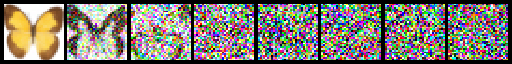

In [38]:
show_images(noisy_xb_default).resize((8 * 64, 64), resample=Image.NEAREST)

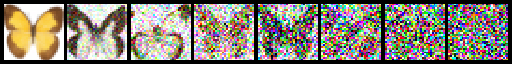

In [39]:
show_images(noisy_xb_cos).resize((8 * 64, 64), resample=Image.NEAREST)

## Defining the model

We will be using some variation of the U-net model here. A key feature of these models is that it predicts images of the same size as the inputs, which is exactly what we need here.

We will be using the `UNet2DModel` from the `diffusers` package that creates the desired architecture for us in `PyTorch`

- `down_block_types` correspond to the downsampling blocks
- `up_block_types`

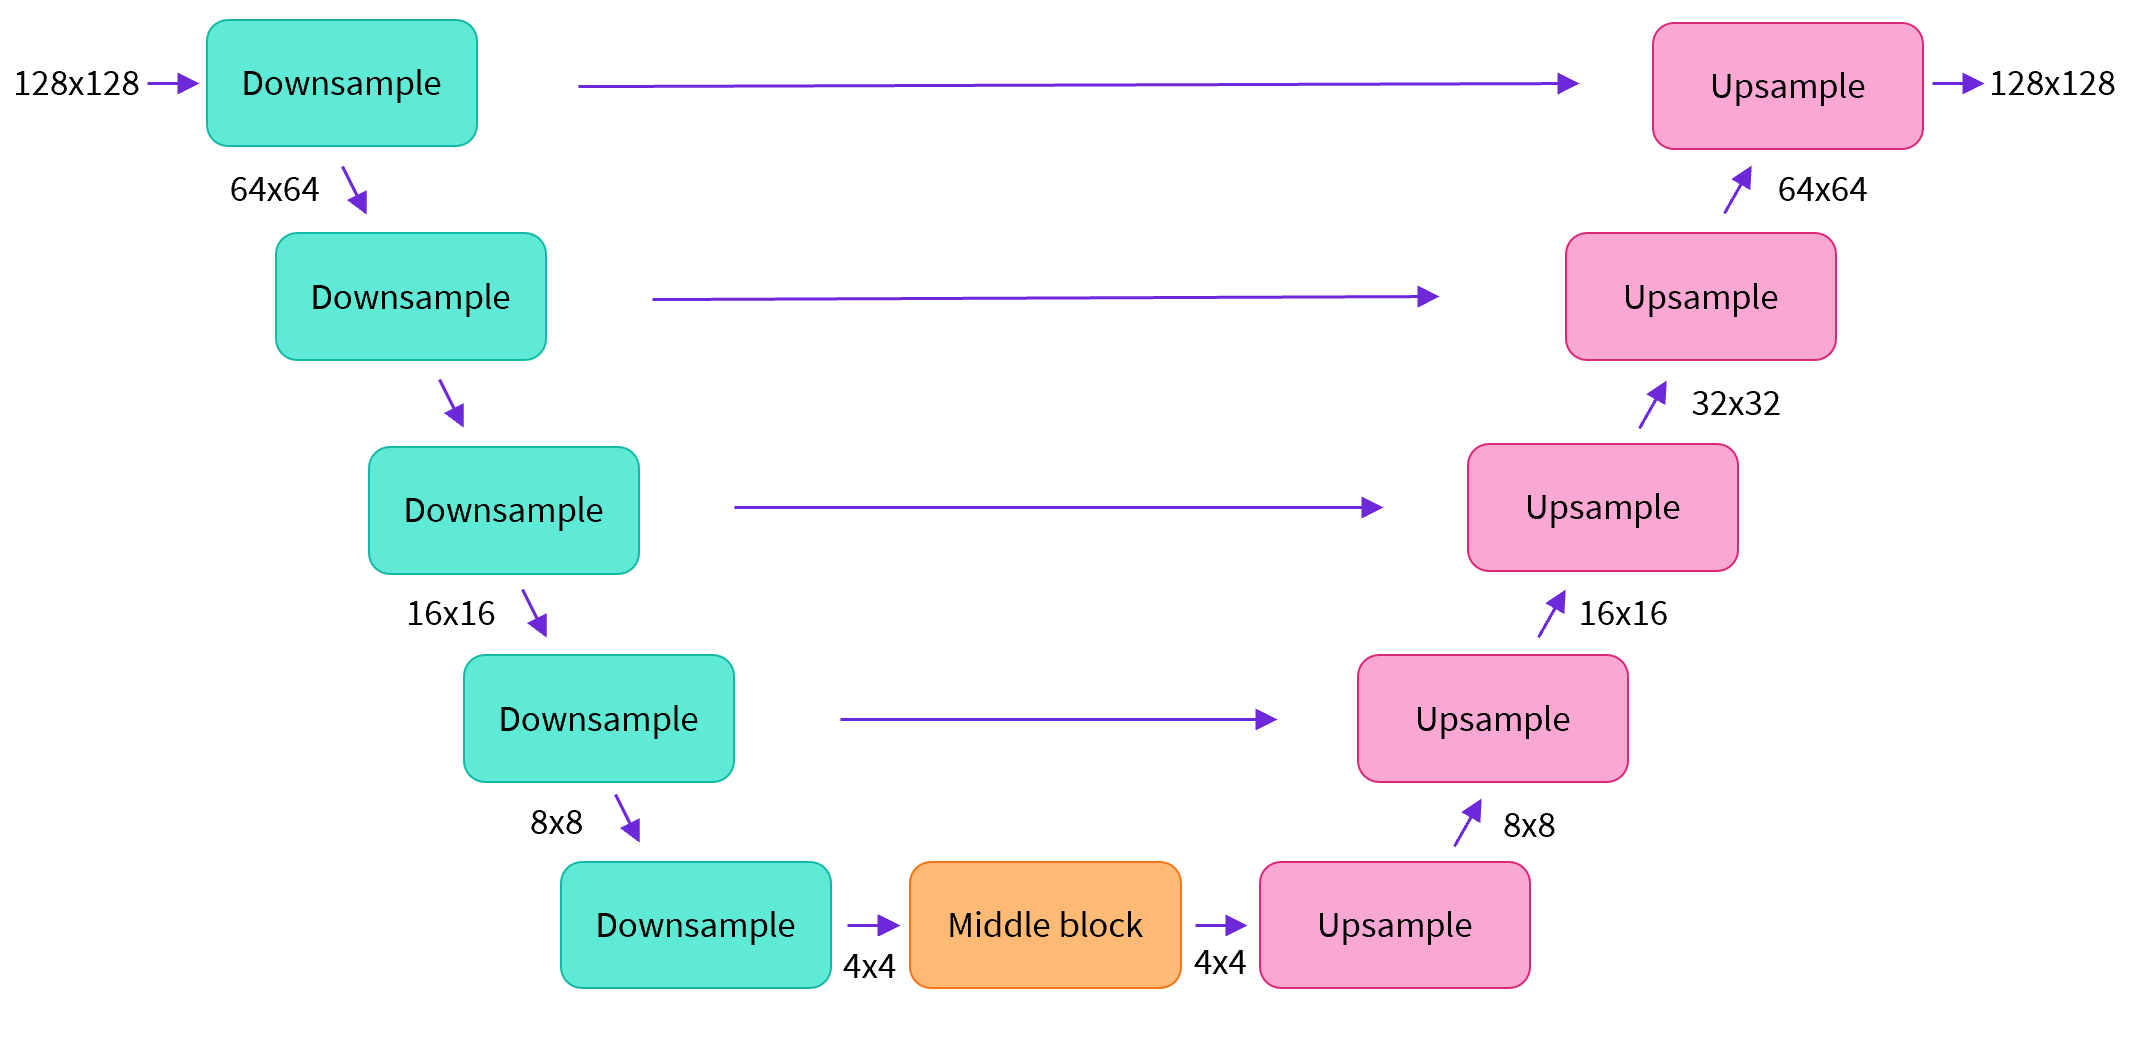

In [19]:
from diffusers import UNet2DModel

# Create a model
model = UNet2DModel(
    sample_size=image_size,  # the target image resolution
    in_channels=3,  # the number of input channels, 3 for RGB images
    out_channels=3,  # the number of output channels
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(64, 128, 128, 256),  # More channels -> more parameters
    down_block_types=(
        "DownBlock2D",  # a regular ResNet downsampling block
        "DownBlock2D",
        "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
        "AttnDownBlock2D",
    ),
    up_block_types=(
        "AttnUpBlock2D",
        "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",
        "UpBlock2D",  # a regular ResNet upsampling block
    ),
)
model.to(device)

UNet2DModel(
  (conv_in): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=64, out_features=256, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=256, out_features=256, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 64, eps=1e-05, affine=True)
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=256, out_features=64, bias=True)
          (norm2): GroupNorm(32, 64, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Conv2d(64, 64, ker

**Explaining the above**

Block Out channels: 
This parameters defines the number of feature maps that each block in the network outputs.

In this example, we have 4 blocks in the down_block_types: 
- The first block outputs 64 features maps
- The second block outputs 128 feature maps
- The third block outputs 128 feature maps
- The 4th block outputs 256 feature maps

The number of parameters in a neural network is determined by the number of weights and biases that need to be learnt during training.

In convolutional layers, the number of parameters depends on the numebr of in put channels, the number of output channels and the size of the convolutional filters. 

When dealing with higher-resolution inputs, we may want to use more down and up-blocks, and keep the attention layers only at the lowest resolution layers to reduce memory usage. 

In [41]:
# Checking if the models follows required dimensions of input and output data
with torch.no_grad():
    model_prediction = model(noisy_xb_default, timesteps).sample
model_prediction.shape

torch.Size([8, 3, 32, 32])

We have a batch size of 8 with 3 channels and an image of 32 * 32 as dimensions.

## Creating a training loop

Here is the flow of the training loop: 

For each batch of data, we :
- sample some random time steps
- Noise the data accordingly
- Feed the noisy data through the model
- Compare the model predictions with the target ( the noise in this case ) using mean squared error as our loss funciton
- Update the model parameters via the `loss.backward()` and `optimizer.step()`

During this process, we also log the losses over time for later plotting.

In [20]:
# Set the noise scheduler
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_schedule="squaredcos_cap_v2")

# Training loop
optimizer = torch.optim.AdamW(model.parameters(), lr=4e-4)

losses = []

model.train()

# Run the training 30 times
for epoch in range(30):
    
    # Pick images randomly for the a batch from the data loader
    # We train the network in batches
    for _, batch in enumerate(train_dataloader):
        
        # Load the clean images to device
        clean_images = batch["images"].to(device)
        
        # Sample noise to add to the images
        # We take a seed noise to add for all images in this batch
        noise = torch.randn(clean_images.shape).to(clean_images.device)
        
        # get the batch size
        bs = clean_images.shape[0] 
    
        # Creating a timesteps matrix for all images in this batch
        timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=clean_images.device).long()
        
        # Add noise to the clean images according to the noise magnitude at each time step
        noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)
        
        # Get the model prediction
        noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
        
        # Calculate the loss
        loss = F.mse_loss(noise_pred, noise)
        loss.backward(loss)
        losses.append(loss.item())
        
        # Update the model parameters with the optimizer
        optimizer.step()
        optimizer.zero_grad()
        
    if(epoch + 1)%5 == 0:
        loss_last_epoch = sum(losses[-len(train_dataloader) :]) / len(train_dataloader)
        print(f"Epoch:{epoch+1}, loss: {loss_last_epoch}")

/opt/conda/lib/python3.10/site-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


Epoch:5, loss: 0.14121364476159215
Epoch:10, loss: 0.11372234392911196
Epoch:15, loss: 0.09926849650219083
Epoch:20, loss: 0.08752875588834286
Epoch:25, loss: 0.07461251225322485
Epoch:30, loss: 0.07505680480971932


**Plotting the loss, we see that the model rapidly improves initially and then continues to get better at a slower rate (which is more obvious if we use a log scale as shown on the right):**

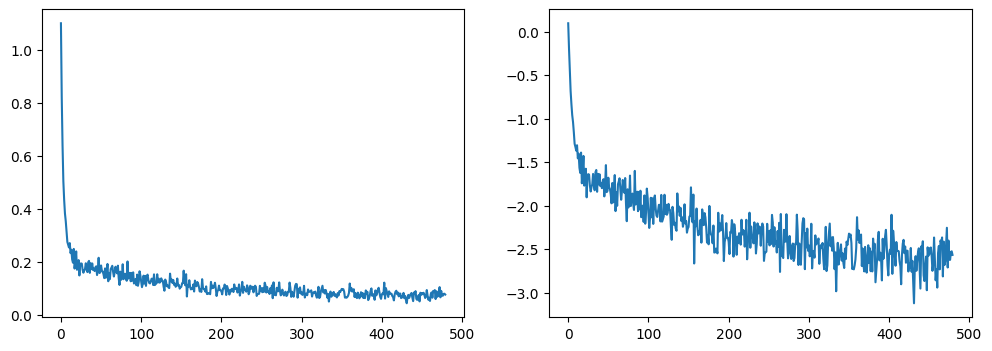

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(losses)
axs[1].plot(np.log(losses))
plt.show()

### Generating images

In [21]:
from diffusers import DDPMPipeline

model.eval()
image_pipe = DDPMPipeline(unet=model, scheduler=noise_scheduler)

  0%|          | 0/1000 [00:00<?, ?it/s]

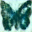

In [52]:
pipeline_output = image_pipe()
pipeline_output.images[0]

  0%|          | 0/1000 [00:00<?, ?it/s]

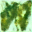

In [53]:
pipeline_output = image_pipe()
pipeline_output.images[0]

### Saving the pipeline to a local folder:

In [22]:
image_pipe.save_pretrained("my_pipeline")

In [23]:
!ls my_pipeline/


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


model_index.json  scheduler  unet


**The scheduler and unet subfolders contain everything needed to re-create those components. For example, inside the unet folder you’ll find the model weights (diffusion_pytorch_model.bin) alongside a config file which specifies the UNet architecture.**

In [24]:
!ls my_pipeline/unet/

config.json  diffusion_pytorch_model.safetensors


### Observing how the images get generated over the timesteps

We begin with random noise, and run through the scheduler timesteps from most to least noisy, removing a small amount of noise each step based on the model prediction:

In [61]:
noise_scheduler.timesteps[1]

tensor(998)

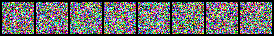

In [68]:
# Random starting point (8 random images):
sample = torch.randn(8, 3, 32, 32).to(device)
show_images(sample)

In [69]:
# Random starting point (8 random images)
sample = torch.randn(8, 3, 32, 32).to(device)

# Store intermediate samples for visualization
intermediate_samples = []

for i, t in enumerate(noise_scheduler.timesteps):
    # Get model prediction
    with torch.no_grad():
        residual = model(sample, t).sample

    # Update sample with step
    sample = noise_scheduler.step(residual, t, sample).prev_sample

    # Store sample at certain steps for visualization (e.g., every 50 steps)
    if i % 50 == 0 or i == len(noise_scheduler.timesteps) - 1:
        intermediate_samples.append(sample)

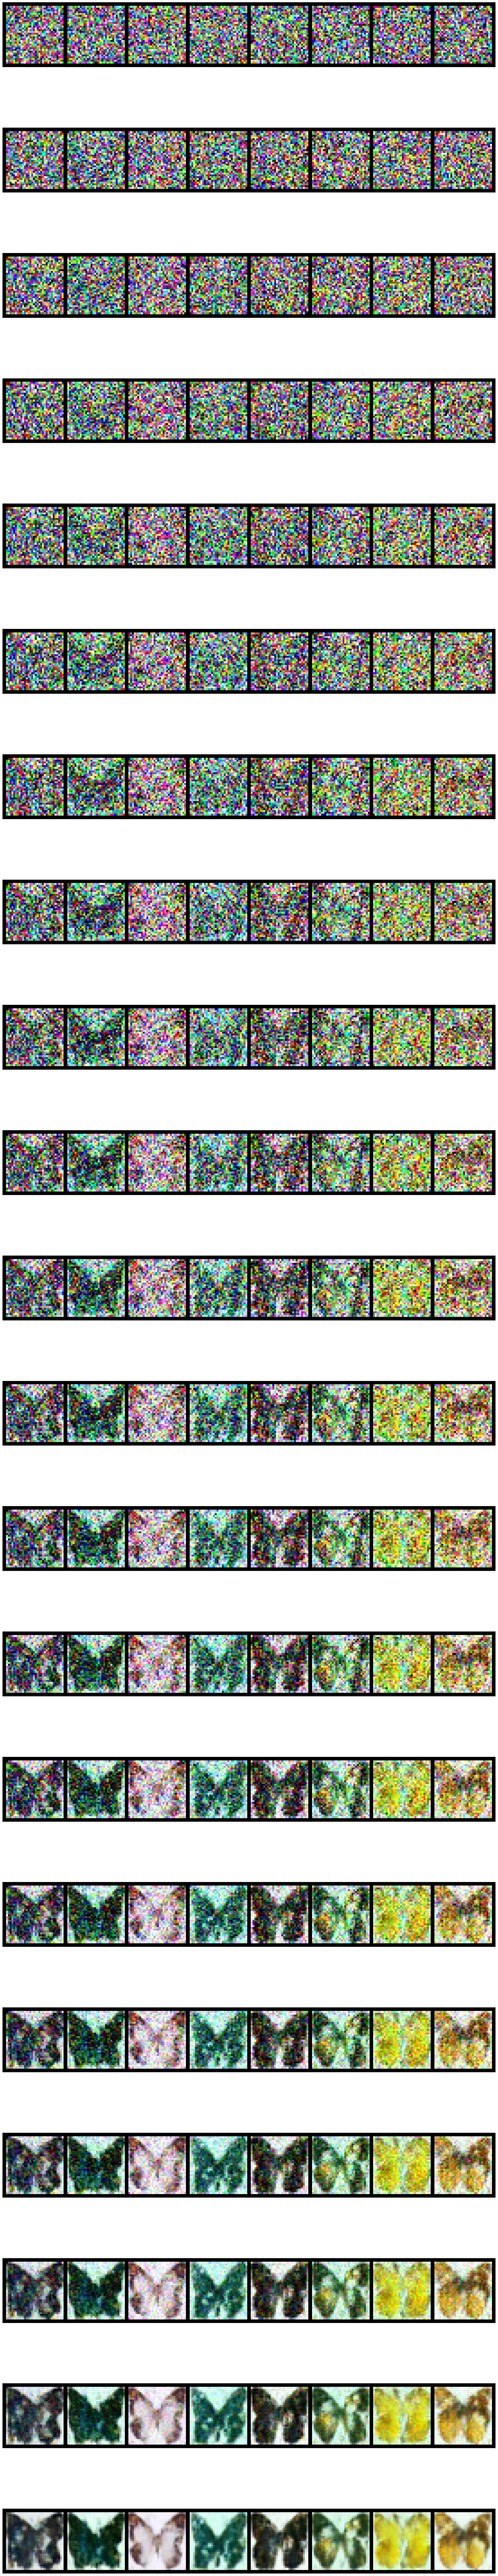

In [83]:
# Display all intermediate samples
fig, axes = plt.subplots(len(intermediate_samples), 1, figsize=(20, len(intermediate_samples) * 5))
for i, sample in enumerate(intermediate_samples):
    axes[i].imshow(show_images(sample))
    axes[i].axis('off')
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.show()

In [26]:
# Create a list to store the frames
frames = [show_images(sample) for sample in intermediate_samples]

# Save the frames as a GIF
frames[0].save('denoising_process.gif', save_all=True, append_images=frames[1:], duration=500, loop=0)

# Display the GIF
from IPython.display import Image as IPImage
IPImage(filename='denoising_process.gif')

NameError: name 'intermediate_samples' is not defined

# Pushing model to hugging face

In [27]:
from huggingface_hub import get_full_repo_name

model_name = "sd-class-butterflies-32"
hub_model_id = get_full_repo_name(model_name)
hub_model_id

'DhruvParth/sd-class-butterflies-32'

In [28]:
from huggingface_hub import HfApi, create_repo

create_repo(hub_model_id)
api = HfApi()
api.upload_folder(folder_path="my_pipeline/scheduler", path_in_repo="", repo_id=hub_model_id)
api.upload_folder(folder_path="my_pipeline/unet", path_in_repo="", repo_id=hub_model_id)
api.upload_file(
    path_or_fileobj="my_pipeline/model_index.json",
    path_in_repo="model_index.json",
    repo_id=hub_model_id
)

HfHubHTTPError: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-66a4669f-136950511e4baf4a392a773d;751ca3b4-5756-4667-a7da-23d233f8fb67)

You already created this model repo

In [30]:
from huggingface_hub import ModelCard

content = f"""
---
license: mit
tags:
- pytorch
- diffusers
- unconditional-image-generation
- diffusion-models-class
---

# Model Card for Unit 1 of the [Diffusion Models Class 🧨](https://github.com/huggingface/diffusion-models-class)

This model is a diffusion model for unconditional image generation of cute 🦋.

## Usage

```python
from diffusers import DDPMPipeline

pipeline = DDPMPipeline.from_pretrained('{hub_model_id}')
image = pipeline().images[0]
image
"""

card = ModelCard(content) 
card.push_to_hub(hub_model_id)

CommitInfo(commit_url='https://huggingface.co/DhruvParth/sd-class-butterflies-32/commit/fc42ce9b294d2395aec27f167ef559b3010a0043', commit_message='Upload README.md with huggingface_hub', commit_description='', oid='fc42ce9b294d2395aec27f167ef559b3010a0043', pr_url=None, pr_revision=None, pr_num=None)

In [31]:
 from diffusers import DDPMPipeline

image_pipe = DDPMPipeline.from_pretrained(hub_model_id)
pipeline_output = image_pipe()
pipeline_output.images[0]

EntryNotFoundError: 404 Client Error. (Request ID: Root=1-66a46710-5ce6d8255cce4bc23506ee6d;e72b8ea2-f5ec-441b-834c-5dc949f66091)

Entry Not Found for url: https://huggingface.co/DhruvParth/sd-class-butterflies-32/resolve/main/model_index.json.